# Assignment 4 - Unsupervised Learning and More Supervised Learning

## *Xingyu Liu*
Netid:  *xl264*

## 1

### [35 points] Clustering

Clustering can be used to determine structure, assign group membership, and representing data through compression. Here you'll dive deeply into clustering exploring the impact of a number of classifiers on 

**(a)** Implement your own k-means algorithm. Demonstrate the efficacy of your algorithm on the `blobs` dataset from `scikit-learn` with 2 and 5 cluster centers. For each implementation rerun the k-means algorithm for values of k from 1 to 10 and for each plot the "elbow curve" where you plot the sum of square error. For each case, where is the elbow in the curve? Explain why.

**(b)** Briefly explain in 1-2 sentences each (and at a very high level) how the following clustering techniques work and what distinguishes them from other clustering methods: (1) k-means, (2) agglomerative clustering, (3) Gaussian mixture models, (4) DBSCAN, and (5) spectral clustering

**(c)** For each of the clustering algorithms in (b) run each of them on the five datasets below. Tune the parameters in each model to achieve better performance. Plot the final result as a 4-by-5 subplot showing the performance of each method on each dataset. Which methods work best/worst on each dataset and why?
- Aggregation.txt
- Compound.txt
- D31.txt
- jain.txt

Each file has three columns: the first two are $x_1$ and $x_2$, then the third is a suggested cluster label (ignore this third column - do NOT include this in your analysis). *The data are from https://cs.joensuu.fi/sipu/datasets/*.

**ANSWER**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#(a)k-means algorithm
import numpy as np
from scipy.spatial.distance import cdist
def KMeans_h(X, k, tol=1e-6):
    """K-means with tolerance"""
    r, c = X.shape
    np.random.seed(12345678)
    centers = X[np.random.choice(r, k, replace=False)]
    delta = np.infty
    while delta > tol:
        dist = cdist(X, centers, 'euclidean')
        z = np.argmin(dist, axis = 1)
        new_centers = np.array([np.mean(X[z == i], axis = 0) for i in range(k)])
        delta = np.sum((new_centers - centers)**2)
        centers = new_centers
    return (z, centers) 

In [3]:
#testing on blob dataset
from sklearn.datasets.samples_generator import make_blobs
#2 centers
X2, y2 = make_blobs(n_samples = 1000, centers = 2,
                  n_features = 2, random_state = 10)
KMeans_h(X2, 2)

(array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
        1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
        0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
        1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
        0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
        1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 

In [4]:
#elbow curve
import matplotlib.pyplot as plt
def elbowCurve(X):
    res = []
    clusters = range(1, 11)
    for n in clusters:
        z, centers = KMeans_h(X, n)
        res.append(np.sum(np.min(cdist(X, centers, 'euclidean'), axis = 1)))
    
    plt.figure(figsize=(10, 6))
    plt.plot(clusters, res, 'bo-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('sum of square error')
    plt.title('Elbow Curve')
    plt.show()

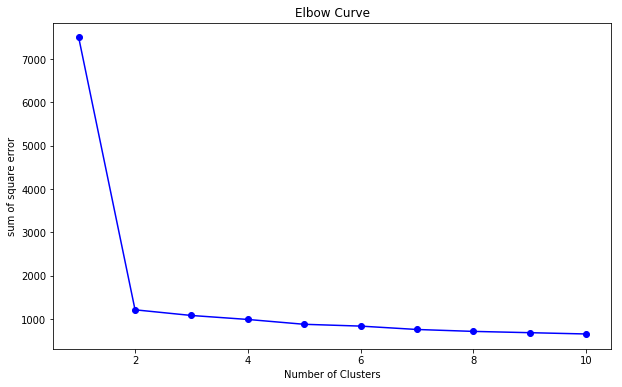

In [5]:
#X2 dataset
elbowCurve(X2)

From the elbow curve above, the curve of the elbow is 2 because there is an obvious angle in that point. Additionally, as number of cluster increase from 1 to 2, the sum of square error drop greatly, but as number of clusters increase from 2, the sum of square error slighty decrease. This curve also suggests that optimal k should be 2 because adding another cluster does not give better clustering of the data. 

In [6]:
#5 centers
X5, y5 = make_blobs(n_samples = 1000, centers = 5,
                  n_features = 2, random_state = 10)
KMeans_h(X5, 5)

(array([1, 4, 0, 1, 0, 2, 2, 2, 1, 4, 2, 1, 4, 3, 4, 2, 4, 4, 1, 2, 3, 2,
        2, 0, 4, 4, 0, 4, 1, 3, 1, 1, 0, 3, 1, 1, 4, 4, 4, 4, 4, 2, 2, 0,
        2, 0, 3, 4, 0, 0, 1, 0, 1, 0, 2, 1, 4, 4, 1, 0, 3, 2, 2, 4, 4, 0,
        1, 0, 3, 0, 1, 3, 2, 4, 3, 3, 2, 0, 4, 0, 1, 1, 1, 1, 0, 0, 0, 2,
        3, 4, 4, 2, 1, 1, 1, 4, 1, 1, 3, 1, 4, 1, 4, 1, 3, 0, 4, 0, 2, 1,
        3, 0, 0, 0, 2, 0, 0, 0, 2, 1, 3, 2, 2, 2, 4, 4, 0, 3, 1, 0, 2, 0,
        0, 2, 3, 3, 4, 2, 4, 3, 0, 0, 0, 4, 3, 4, 0, 1, 3, 3, 0, 4, 0, 4,
        4, 0, 2, 0, 2, 2, 3, 4, 2, 2, 3, 2, 1, 0, 2, 4, 2, 4, 4, 1, 3, 2,
        0, 4, 4, 1, 2, 0, 0, 1, 1, 2, 4, 1, 0, 4, 2, 4, 4, 2, 4, 2, 4, 2,
        1, 1, 2, 1, 4, 0, 3, 4, 2, 1, 0, 4, 1, 1, 2, 2, 0, 0, 0, 0, 3, 2,
        0, 4, 1, 1, 2, 3, 0, 2, 0, 1, 1, 0, 3, 2, 0, 1, 4, 2, 1, 3, 4, 1,
        4, 2, 1, 2, 3, 4, 4, 2, 3, 2, 1, 3, 4, 0, 2, 1, 4, 0, 2, 4, 3, 3,
        3, 3, 0, 4, 1, 2, 1, 0, 1, 1, 4, 0, 1, 1, 1, 3, 3, 0, 3, 1, 3, 3,
        2, 0, 3, 3, 1, 3, 0, 0, 0, 0, 

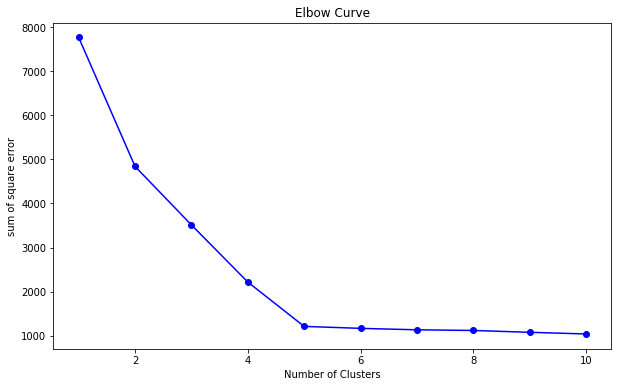

In [7]:
#X5 dataset
elbowCurve(X5)

From the elbow curve above, the curve of the elbow is 5 because there is an obvious angle in that point. Additionally, as number of cluster increase from 1 to 5, the sum of square error drop greatly, but as number of clusters increase from 5, the sum of square error slighty decrease. This curve also suggests that optimal k should be 5 because adding another cluster does not give better clustering of the data.

**(b)** Briefly explain in 1-2 sentences each (and at a very high level) how the following clustering techniques work and what distinguishes them from other clustering methods: (1) k-means, (2) agglomerative clustering, (3) Gaussian mixture models, (4) DBSCAN, and (5) spectral clustering


1.k-means: k-means is centroid-based clustering and it is an iterative algorithm that aims to find local optimal in each iteration. It works by updating the k centroids and which cluster the data points belong to until convergence. It works fast but the number of clusters is required and it is sensitive to initialization of centroids. Besides, it struggles when there are nonlinear boundaries, variation in cluster vaeiance or correlation between features. 

2.agglomerative clustering: It is connectivity-based and starts with all the data points assigned to a cluster of their own. Then two nearest clusters are merged into the same cluster until there is only a single cluster left. It computes quite slow and dose not need number of clusters beforehand. It performs well when clusters are well-seperated but struggles when intercluster distance is not sufficient to distinguish between clusters.

3.Guassian misture models: It is distribuition-based and it tries to fit a model consisting of a mixture of different gaussian distributions to the data set and each gaussian distribution represent a cluster. The number of clusters is required beforehand and it assumes all data points belong to the same distribution, Guassian here. It is more flexible in terms of cluster covariance than k-meand. However, it suffers from overfitting.

4.DBSCAN:It is density-based and DBSCAN groups together points that are close to each other based on a distance measurement and a minimum number of points. It also marks the points that are in low-density as outliers. The number of clusters is not required and it can find arbitarily shaped clusters and it is also robust to outliers. However, it cannot handle significant variation in cluster density and is not entirely deterministic.

5.spectral clustering: It is connectivity-based and it starts from the affinity matrix of all data points. It perform PCA on affinity matrix and projects data to lower dimension and performs clustering in lower dimension. It makes few assumptions about data, which oftern produces good clustering results. However, it is slow for large datasets and requires specifying number of clusters.

**(c)** For each of the clustering algorithms in (b) run each of them on the five datasets below. Tune the parameters in each model to achieve better performance. Plot the final result as a 4-by-5 subplot showing the performance of each method on each dataset. Which methods work best/worst on each dataset and why?
- Aggregation.txt
- Compound.txt
- D31.txt
- jain.txt

Each file has three columns: the first two are $x_1$ and $x_2$, then the third is a suggested cluster label (ignore this third column - do NOT include this in your analysis). *The data are from https://cs.joensuu.fi/sipu/datasets/*.

In [31]:
#load data
import pandas as pd
aggregation = pd.read_csv('data/Aggregation.txt', sep = "\t", header = None, usecols=[0,1]) #k = 7
aggregation = np.array(aggregation)
compound = pd.read_csv('data/Compound.txt', sep = "\t", header = None, usecols=[0,1])#k = 6
compound = np.array(compound)
D31 = pd.read_csv('data/D31.txt', sep = "\t", header = None, usecols=[0,1])#k = 31
D31 = np.array(D31)
jain = pd.read_csv('data/jain.txt', sep = "\t", header = None, usecols=[0,1])#k = 2
jain = np.array(jain)

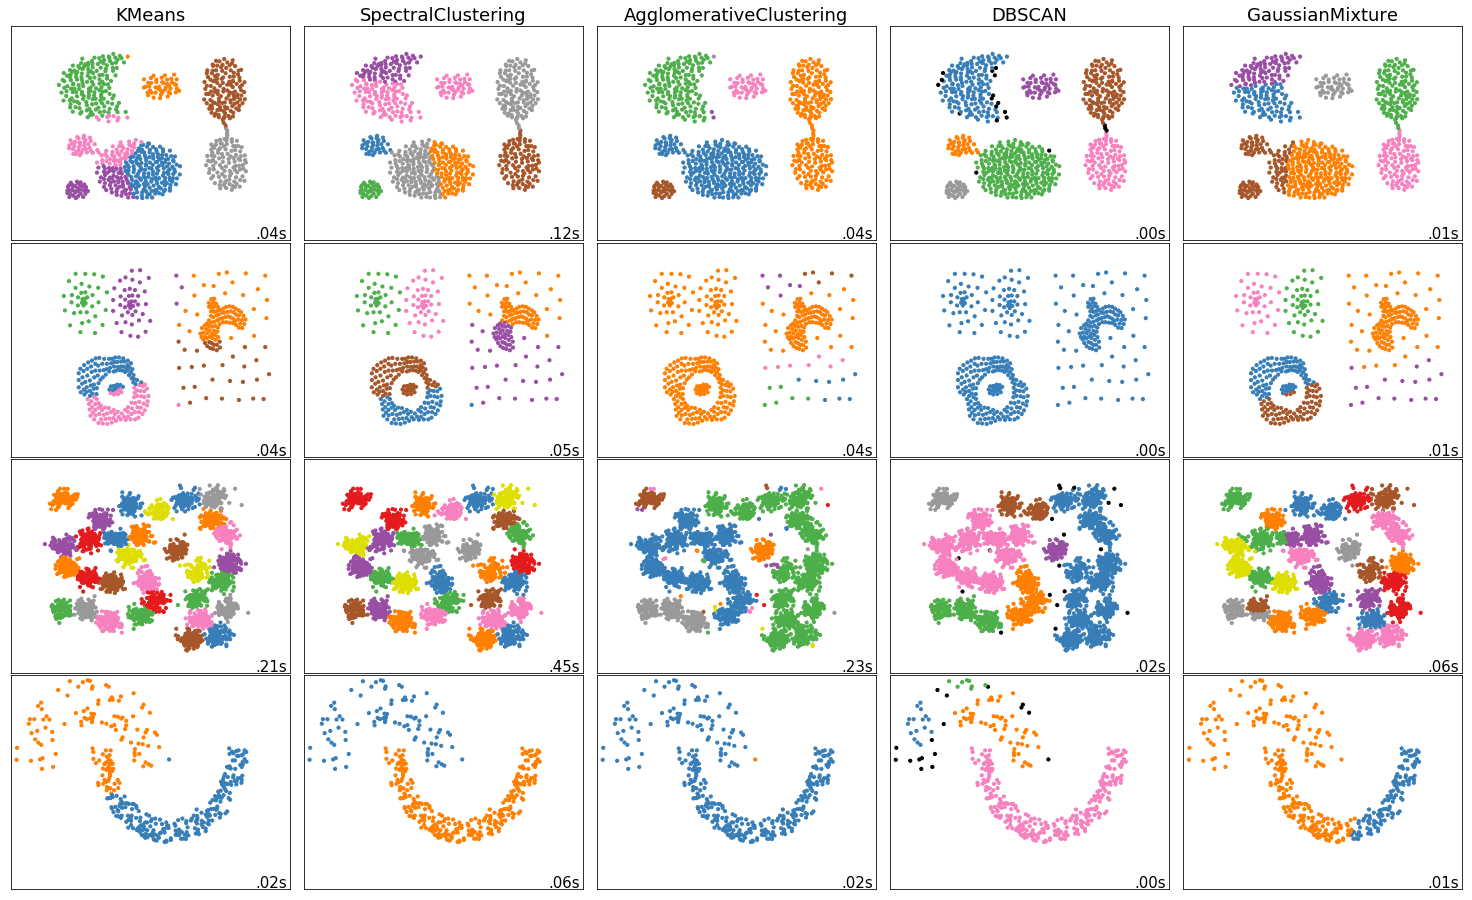

In [80]:
#plot
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3}

datasets = [
    (aggregation, {'n_clusters': 7, 'eps': .12, 'n_neighbors': 6}),
    (compound, {'n_clusters': 6, 'eps': .6,  'n_neighbors': 24}),
    (D31, {'n_clusters': 31, 'eps': .12, 'n_neighbors': 8}),
    (jain, {'n_clusters': 2, 'eps': .25, 'n_neighbors': 8})]

for i_dataset, (X, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)
    
    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)
    
    # Create cluster objects
    kmeans = cluster.KMeans(n_clusters=params['n_clusters'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')
    dbscan = cluster.DBSCAN(eps=params['eps'])
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors", n_neighbors = params['n_neighbors'])
    
    clustering_algorithms = (
        ('KMeans', kmeans),
        ('SpectralClustering', spectral),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('GaussianMixture', gmm)
    )
    
    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()


On aggregation dataset, DBSCAN works best because the density of each cluster are quite similar and the densitity-based DBSCAN can excel in this case. In contrast, agglomerative clustering works worst because the intercluster distance is not sufficient to distinguish between clusters.

On compound dataset, no method can make exact clustering but gaussian mixture model works better because there is variation in cluster variance and there is correlation between features. DBSCAN works worst because the density of those clusters vary a lot and DBSCAN cannot handle this situation.

On D31 dataset,k-meand works best because in this case the variance of each cluster is almost equal. In contrast,agglomerative works worst because the intercluster distance is not sufficient to distinguish between clusters and each cluster are so close to others the distance cannot properly distinguish them.

On jain dataset, spectral clustering works best because these two cluster are non-linear and are arbitary shaped, which other methods cannot handle well. Besides, since spectral clustering focuses on connectednedd and the each cluster in this case is closely connectes, spectral works best. In contrast, agglomerative works worst because the two clusters are not well seperated and the intercluster distance is not sufficient to distinguish between clusters.

## 2

### [25 points] Visualizing and clustering digits with PCA and t-SNE

**(a)** Load the `scikit-learn` digits dataset. Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the resulting 2-dimensional representation of the data.

**(b)** t-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/). A video introducing this method can be found [here](https://www.youtube.com/watch?v=RJVL80Gg3lA&list=UUtXKDgv1AVoG88PLl8nGXmw) for those who are interested.

*NOTE: An important note on t-SNE is that it is an example of transductive learning. This means that the lower dimensional representation of the data is only applicable to the specific input data - you can't just add a new sample an plot it in the sample 2-dimensional space without entirely rerunning the algorithm and finding a new representation of the data.*

**(c)** Compare/contrast the performance of these two techniques. Which seemed to cluster the data best and why? Given the comparative clustering performance that you observed and the note on t-SNE above, what are the pros and cons of PCA and t-SNE? *Note: You typically will not have labels available.*

**ANSWER**

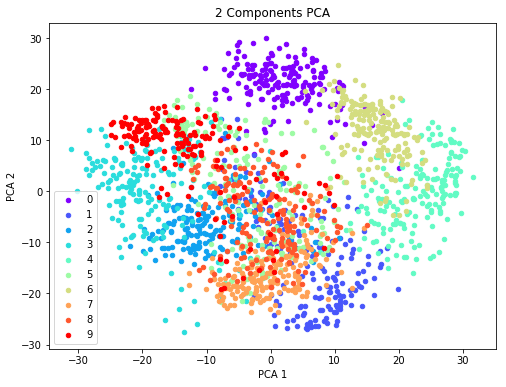

In [110]:
#(a)
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
digits = load_digits()
pca = PCA(n_components = 2)
digits_pca = pca.fit_transform(digits.data)
pca_df = pd.DataFrame(np.c_[digits_pca, digits.target])
pca_df.columns = ['pca1', 'pca2', 'label']
#plot the scatter
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, 10)) # generate 10 colors
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(10):
    temp = pca_df[tsne_df['label']==i] # find all the indexes for each digit (0 - 9)
    ax.scatter(temp['pca1'], temp['pca2'], color=colors[i], label=i, s=20) # plot each digit
ax.legend()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('2 Components PCA')
plt.show()

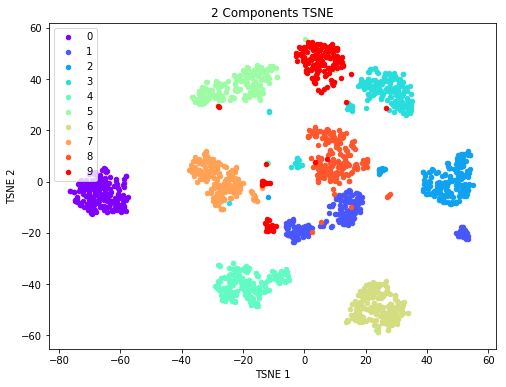

In [111]:
#(b)
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2)
digits_tsne = tsne.fit_transform(digits.data)
tsne_df = pd.DataFrame(np.c_[digits_tsne, digits.target])
tsne_df.columns = ['tsne1', 'tsne2', 'label']
#plot the scatter
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, 10)) # generate 10 colors
#plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(10):
    temp = tsne_df[tsne_df['label']==i] # find all the indexes for each digit (0 - 9)
    ax.scatter(temp['tsne1'], temp['tsne2'], color=colors[i], label=i, s=20) # plot each digit
ax.legend()
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('2 Components TSNE')
plt.show()

**(c)** Compare/contrast the performance of these two techniques. Which seemed to cluster the data best and why? Given the comparative clustering performance that you observed and the note on t-SNE above, what are the pros and cons of PCA and t-SNE? *Note: You typically will not have labels available.*

**ANSWER**

From the contrast above, t-SNE seemed to cluster the data best because we know that PCA is using the correlation between some dimensions and tries to keep a minimum number of variables that keeps the maximum amount of variation or information about how the original data is distributed. Thus PCA cannot well deal with non-linear data and cannot preserve the locality. Especially for digits, 2 components clearly not enough to set all of them apart. In contrast, t-SNE minimized the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding. Thus it is designed to preserve local distance betwen points in the original space, which means that t-SNE is particularly effective at preserving clusters in the original space.

**PCA**:

**Pros:**
* It is very efficient and fast. It also occupy smaller storage.
* If can deal with large datasets. 
* There are no special assumptions on the data.

**Cons:**
* PCA cannot preserve locality. PCA cannot well deal with non-linear data.
* It is hard to interpret the resulting features.
* Results are not always the best for visualization.
* Strongly focused in variance, sometimes there is not a direct relationship between variance and predictive power so it can discard some useful information.

**t-SNE**

**Pros:**
* t-SNE is incredibly flexible and can often find structure where other dimensionality-reduction algorithms cannot.
* t-SNE can preserve locality and can work well when data is strongly non-linear.
* Can work well for visualization.

**Cons:**
* It is very computationally heavy and also space consuming.
* Since t-SNE scales quadratically in the number of objects N, its applicability is limited to data sets with only a few thousand input objects; beyond that, learning becomes too slow to be practical.
* In practical, it is highly recommended to use another dimensionality reduction methods first before using t-SNE.

## 3

### [30 points] PCA for compression

From the digits dataset, extract all the 5's. Your going to create a compressed version of one of an image.

**(a)** Plot a number of examples of the original images.

**(b)** Perform PCA on the data. Create a plot showing the fraction of variance explained as you incorporate from $1$ to $N$ components. 

**(c)** Select an image (from your dataset of 5's) that you will "compress" using PCA. Use the principal components extracted in (b) for data compression: choose the top $k$ principal components and represent the data using a subset of the total principal components. Plot the original image, and compressed versions with different levels of compression (i.e. using different numbers of the top principal components): use $k=1,5,10,25$.

**(d)** How many principal components are required to well-approximate the data in (c)? How much compression is achieved in each case (express compression as the ratio of $k$ to the original dimension of the data $D$, so it ranges from $0$ to $1$). Comment on each case.

**ANSWER**

In [166]:
#extract all 5
five = digits.data[digits.target == 5] #182

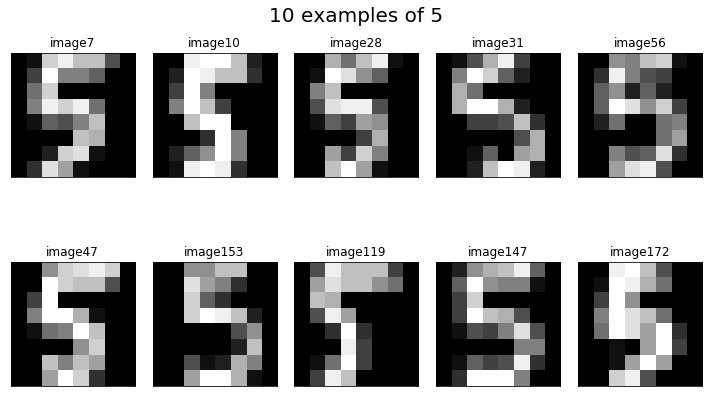

In [185]:
#plot 10 examples
examples = [7,10,28,31,56,47,153,119,147,172]
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(10, 6),
                        subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(left=0.03, right=0.97, hspace=0.3, wspace=0.05)
for ax, idx in zip(axs.flat, examples):
    ax.imshow(digits.images[digits.target == 5][idx], cmap='gray')
    ax.set_title('image'+str(idx))

plt.tight_layout()
plt.suptitle('10 examples of 5',fontsize=20)
plt.show()

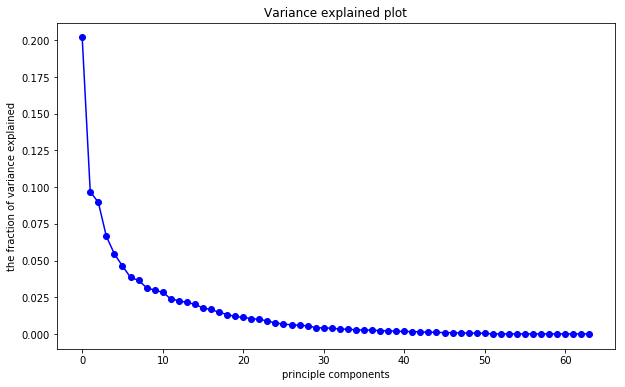

In [168]:
#(b)
five_st = StandardScaler().fit_transform(five)
N = five.shape[1] #set N to be the full dimension
pca_ = PCA(n_components = N)
pca_.fit_transform(five_st)
var = pca_.explained_variance_ratio_
plt.figure(figsize=(10,6))
plt.plot(var, 'bo-')
plt.xlabel('principle components')
plt.ylabel('the fraction of variance explained')
plt.title('Variance explained plot')
plt.show()

**(c)** Select an image (from your dataset of 5's) that you will "compress" using PCA. Use the principal components extracted in (b) for data compression: choose the top $k$ principal components and represent the data using a subset of the total principal components. Plot the original image, and compressed versions with different levels of compression (i.e. using different numbers of the top principal components): use $k=1,5,10,25$.

In [221]:
#(c)
reconstruct = []
for i in (1, 5, 10, 25, 64):
    pca_t = PCA(n_components=i)
    lower_d = pca_t.fit_transform(five_st)
    approxmination = pca_t.inverse_transform(lower_d)
    reconstruct.append(approxmination[sample_idx].reshape(8, 8))

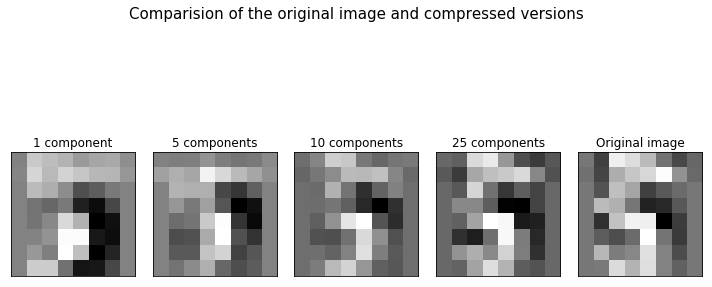

In [240]:
#plot 
title = ['1 component', '5 components', '10 components', '25 components', 'Original image']
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(10, 6),
                        subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(left=0.03, right=0.97, hspace=0.3, wspace=0.05)
for ax, idx in zip(axs.flat, range(5)):
    ax.imshow(reconstruct[idx], cmap='gray')
    ax.set_title(title[idx])

plt.tight_layout()
plt.suptitle('Comparision of the original image and compressed versions',fontsize=15)
plt.show()

**(d)** How many principal components are required to well-approximate the data in (c)? How much compression is achieved in each case (express compression as the ratio of $k$ to the original dimension of the data $D$, so it ranges from $0$ to $1$). Comment on each case.

In [244]:
print('total variance explained by 10 components:', sum(var[:10]))
print('total variance explained by 25 components:', sum(var[:25]))

total variance explained by 10 components: 0.6921354382702342
total variance explained by 25 components: 0.9311799683155295


From the comparision above, 25 principle components are required to well-approximate the data in (c) and I checked with the total variance explained by different components. When k = 10, only 0.6921 variance are explained, but when k = 25, 0.9311 variance are explained. This also indicates among the given k, (1, 5, 10, 25), 25 principle components are best choice and can best approximate the data.

In [247]:
print('compression achieved when k = 1:', (64-1)/64)
print('compression achieved when k = 5:', (64-5)/64)
print('compression achieved when k = 10:', (64-10)/64)
print('compression achieved when k = 25:', (64-25)/64)

compression achieved when k = 1: 0.984375
compression achieved when k = 5: 0.921875
compression achieved when k = 10: 0.84375
compression achieved when k = 25: 0.609375


## 4

### [15 points] Build and test your own Neural Network for classification

There is no better way to understand how one of the core techniques of modern machine learning works than to build a simple version of it yourself. In this exercise you will construct and apply your own neural network classifier.

**(a)** Create a neural network class that follows the `scikit-learn` classifier convention by implementing `fit`, `predict`, and `predict_proba` methods. Your `fit` method should run backpropagation on your training data using stochastic gradient descent. Assume the activation function is a sigmoid. Choose your model architecture to have two input nodes, two hidden layers with five nodes each, and one output node.

**(b)** Create a training and test dataset using `sklearn.datasets.make_moons(N, noise=0.20)`, where $N_{train} = 500$ and $N_{test} = 100$. Train and test your model on this dataset. Adjust the learning rate and number of training epochs for your model to improve performance as needed. In two subplots, plot the training data on one, and the test data on the other. On each plot, also plot the decision boundary from your neural network trained on the training data. Report your performance on the test data with an ROC curve.

**(c)** Suggest at least two ways in which you neural network implementation could be improved.

**ANSWER**

In [104]:
#(a)
np.random.seed(123)
class Neural_Network:
    def __init__(self):
        #define hyperparameters
        self.inputLaterSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 5
        
        #Weights
        self.W1 = np.random.rand(self.inputLaterSize, self.hiddenLayerSize) 
        self.W2 = np.random.rand(self.hiddenLayerSize, self.hiddenLayerSize)
        self.W3 = np.random.rand(self.hiddenLayerSize, self.outputLayerSize) #connect to output layer 
        
    def sigmoid(self, z):
        '''sigmoid function'''
        return 1/(1 + np.exp(-z))
    
    def sigmoidPrime(self, z):
        '''derivative of sigmoid function'''
        return np.exp(-z)/((1 + np.exp(-z))**2)
        
    def forward(self, X):
        '''propagate input through network'''
        self.a1 = np.dot(X, self.W1) #2*5
        self.z1 = self.sigmoid(self.a1)  #2*5
        self.a2 = np.dot(self.z1, self.W2) #5*5
        self.z2 = self.sigmoid(self.a2) #5*5
        self.a3 = np.dot(self.z2, self.W3) #5*1
        yHat = self.sigmoid(self.a3) #5*1
        return yHat
    
    def costFunction(self, X, y):
        '''compute cost for given X, y, uses weights already stored in class'''
        yHat = self.forward(X)
        y = y.reshape(-1, 1)
        J = 0.5*np.sum((y - yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        '''compute derivative with respect to W1, W2 and W3'''
        self.yHat = self.forward(X) #5*1
        
        delta3 = np.multiply(-(y - self.yHat), self.sigmoidPrime(self.a3)) #5*1
        dJdW3 = np.dot(self.z2.T, delta3) #5*1
        
        delta2 = np.dot(delta3, self.W3.T) * self.sigmoidPrime(self.a2)
        dJdW2 = np.dot(self.z1.T, delta2)
        
        delta1 = np.dot(delta2, self.W2.T) * self.sigmoidPrime(self.a1)
        dJdW1 = np.dot(X.T, delta1)
        
        return dJdW1, dJdW2, dJdW3
    
    def sgd(self, X, y, lr = 0.01, tol = 1e-4, max_iter = 100000):
        '''stochastic gradient descent'''
        tolerance = np.inf
        cost = 0
        iteration = 0
        costList = []
        while tolerance > tol and iteration < max_iter:
            for x_i, y_i in zip(X, y):
                x_i = x_i.reshape(1, -1)
                dJdW1, dJdW2, dJdW3 = self.costFunctionPrime(x_i, y_i)
                self.W3 -= lr * dJdW3
                self.W2 -= lr * dJdW2
                self.W1 -= lr * dJdW1
            cost0 = cost
            costList.append(cost)
            cost = self.costFunction(X, y)
            tolerance = abs(cost - cost0)
            iteration += 1
        
        return self.W1, self.W2, self.W3
    
    def fit(self, X, y, epoch, lr = 0.01, tol = 1e-6, max_iter = 10):
        '''train nn '''
        for i in range(epoch):
            self.W1, self.W2, self.W3 = self.sgd(X, y, lr, tol, max_iter)
        pass
    
    def predict_prob(self, X_test):
        '''predict the probability for test data'''
        yHatProb = self.forward(X_test)
        return yHatProb
    
    def predict(self, X_test):
        '''predict the result of test data'''
        yHat = self.forward(X_test)
        yHat[np.where(yHat < 0.5)] = 0
        yHat[np.where(yHat > 0.5)] = 1 
        return yHat.ravel().astype(int)
    

**(b)** Create a training and test dataset using `sklearn.datasets.make_moons(N, noise=0.20)`, where $N_{train} = 500$ and $N_{test} = 100$. Train and test your model on this dataset. Adjust the learning rate and number of training epochs for your model to improve performance as needed. In two subplots, plot the training data on one, and the test data on the other. On each plot, also plot the decision boundary from your neural network trained on the training data. Report your performance on the test data with an ROC curve.

In [82]:
#(b)
#creat dataset
from sklearn.datasets import make_moons
X_train, y_train = make_moons(500, noise = 0.2, random_state = 889)
X_test, y_test = make_moons(100, noise = 0.2, random_state = 102)
#train neural network
nn = Neural_Network()
nn.fit(X_train, y_train,30) #epochs = 30, learning rate = 0.01
y_prob = nn.predict_prob(X_test)

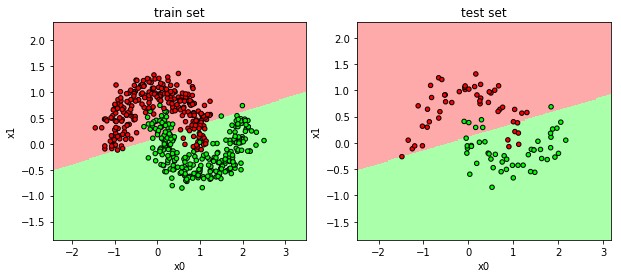

In [170]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
step = 0.02 #step size in the mesh
#fig, axes = plt.subplots(1, 2, figsize = (20, 16))
#X_train
x1_min, x1_max = X_train[:,0].min() - 1,X_train[:,0].max() + 1
x2_min, x2_max = X_train[:,1].min() - 1,X_train[:,1].max() + 1
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, step),
                          np.arange(x2_min, x2_max, step))
z = nn.predict_prob(np.c_[x1.ravel(),x2.ravel()])
z = z.reshape(x1.shape)

f = plt.figure(figsize=(10, 4))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.pcolormesh(x1, x2, z, cmap=cmap_light)
ax.scatter(X_train[:,0],X_train[:,1], c = y_train,cmap = cmap_bold,
            edgecolor='k', s = 20, label = np.unique(y_train)[0])
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_title('train set')

#X_test
x1_min, x1_max = X_test[:,0].min() - 1,X_test[:,0].max() + 1
x2_min, x2_max = X_test[:,1].min() - 1,X_test[:,1].max() + 1
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, step),
                          np.arange(x2_min, x2_max, step))
z = nn.predict_prob(np.c_[x1.ravel(),x2.ravel()])
z = z.reshape(x1.shape)
plt.subplot(122)
ax2.pcolormesh(x1, x2, z, cmap = cmap_light)
ax2.scatter(X_test[:,0],X_test[:,1], c = y_test, cmap = cmap_bold,
            edgecolor = 'k', s = 20, label = np.unique(y_test)[0])
ax2.set_xlabel('x0')
ax2.set_ylabel('x1')
ax2.set_title('test set')
plt.show()

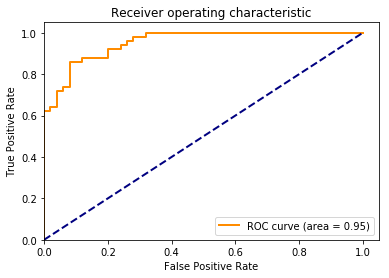

In [175]:
#Report your performance on the test data with an ROC curve.
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0, 1.05])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**(c)** Suggest at least two ways in which you neural network implementation could be improved.

1.**Add the bias term.** Bias is an additional parameter in the Neural Network which is used to adjust the output along with the weighted sum of the inputs to the neuron. Therefore it is a constant which helps the model in a way that it can fit best for the given data.

2.**Add the regularization term.** In order to avoid overfitting, we can add regularization term, such as L1 regularization or L2 regularization, to the cost function which penalizes overly complex models. We can also introduce the hyperparameter lambda to tune the intensity of penalities for high model complexity.

3.**Try other optimization methods.** Instead of using stochastic gradient descent, we can also try mini-batch gradient descent. Mini-batch gradient descent seeks to find a balance between the robustness of stochastic gradient descent and the efficiency of batch gradient descent. It is the most common implementation of gradient descent used in the field of deep learning. Besides, we can also try other optimization methods like Adam.

4.**Modify the architecture of neural network.** To improve the performance, we can stack more hidden layers on the current network or adjust the size of each hidden layer.

5.**Try different activation function.** Instead of sigmoid function, we can also try to use Relu and compare their performance.